In [29]:
import pickle
import pandas as pd

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Adjust file path as needed
file_path = r'cifar-100-python\train'  # Or use os.path.join
datadict = unpickle(file_path)

X = datadict[b'data']
Y = datadict[b'fine_labels']

In [30]:
datadict.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

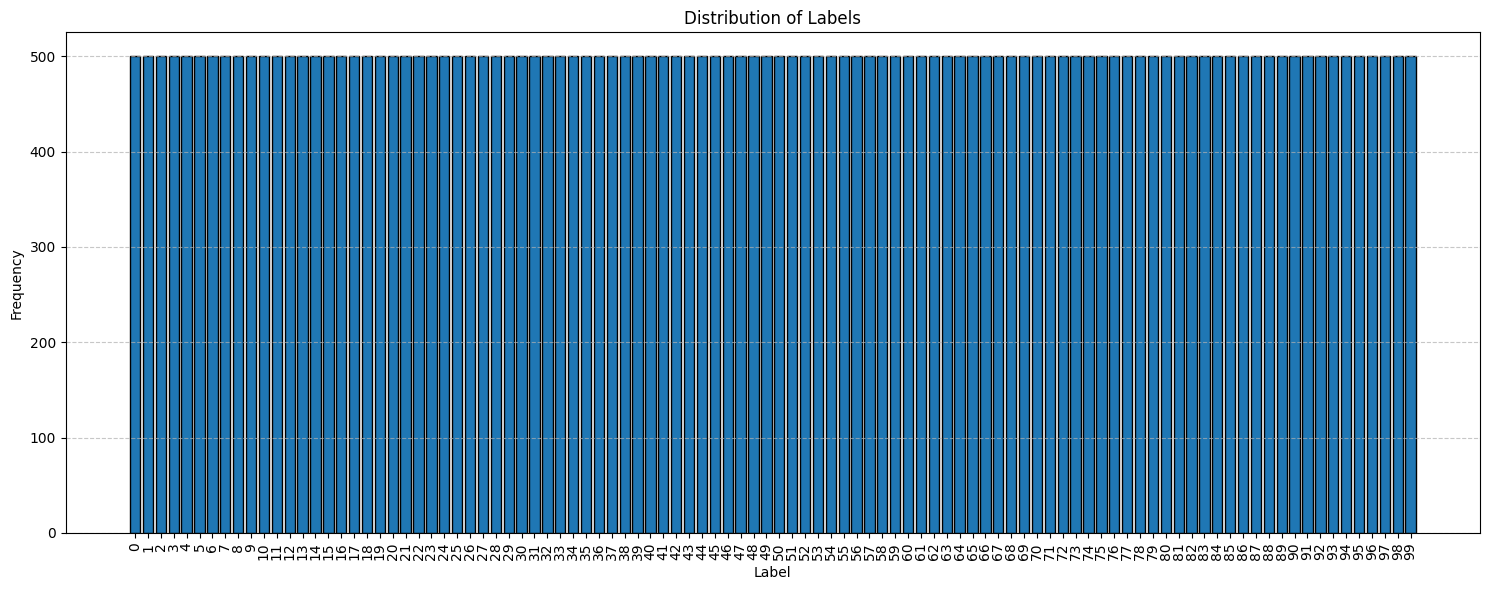

In [31]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load data
file_path = r'cifar-100-python\train'  # Or use os.path.join
datadict = unpickle(file_path)

# Extract data and labels
X = datadict[b'data']
Y = datadict[b'fine_labels']

# Convert labels to numpy array for convenience
Y = np.array(Y)

# Plot histogram of labels
plt.figure(figsize=(15, 6))  # Increase figure size
plt.hist(Y, bins=np.arange(101) - 0.5, edgecolor='black', rwidth=0.8)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Rotate x-axis labels to avoid crowding
plt.xticks(ticks=np.arange(0, 100, 1), labels=np.arange(100), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

    label  count
0       0      0
1       1      4
2       2      0
3       3      0
4       4     37
..    ...    ...
95     95      0
96     96     12
97     97   5046
98     98   1893
99     99    208

[100 rows x 2 columns]
Number of samples in CIFAR-100 training set that have no data:  51


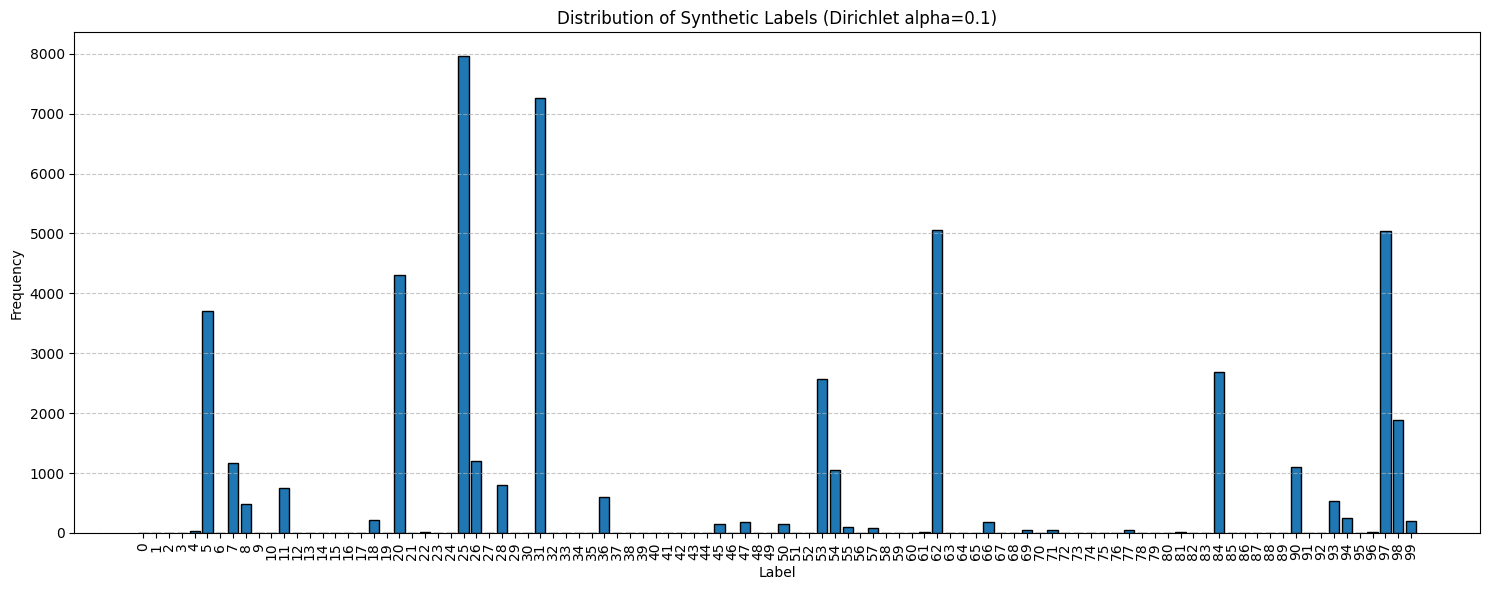

In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load CIFAR-100 data
file_path = r'cifar-100-python\train'  # Adjust this path as necessary
datadict = unpickle(file_path)

# Extract labels
Y = datadict[b'fine_labels']
Y = np.array(Y)

# Number of samples in CIFAR-100 training set
num_samples = len(Y)

# Parameters for Dirichlet distribution
alpha = 0.1
num_categories = 100  # Number of CIFAR-100 labels

# Generate Dirichlet distribution samples
dirichlet_proportions = np.random.dirichlet([alpha] * num_categories, size=1)[0]

# Create synthetic label distribution based on Dirichlet proportions
synthetic_labels = np.random.choice(
    num_categories, 
    size=num_samples, 
    p=dirichlet_proportions
)

# Create a DataFrame to store the label distribution
label_counts = np.bincount(synthetic_labels, minlength=num_categories)
label_distribution_df = pd.DataFrame({
    'label': np.arange(num_categories),
    'count': label_counts
})

# Print the DataFrame
print(label_distribution_df)

#Number of samples in CIFAR-100 training set that have no data
print("Number of samples in CIFAR-100 training set that have no data: ", len(label_distribution_df[label_distribution_df["count"] == 0]))

# Plot histogram of synthetic Dirichlet-based labels
plt.figure(figsize=(15, 6))
plt.hist(synthetic_labels, bins=np.arange(num_categories + 1) - 0.5, edgecolor='black', rwidth=0.8)
plt.title(f'Distribution of Synthetic Labels (Dirichlet alpha={alpha})')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Set x-axis ticks to show all labels from 0 to 99
plt.xticks(ticks=np.arange(num_categories), labels=np.arange(num_categories), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

    label  count
0       0    236
1       1     46
2       2   1701
3       3    923
4       4     26
..    ...    ...
95     95    152
96     96     33
97     97    121
98     98    719
99     99    796

[100 rows x 2 columns]
Number of samples in CIFAR-100 training set that have no data:  2


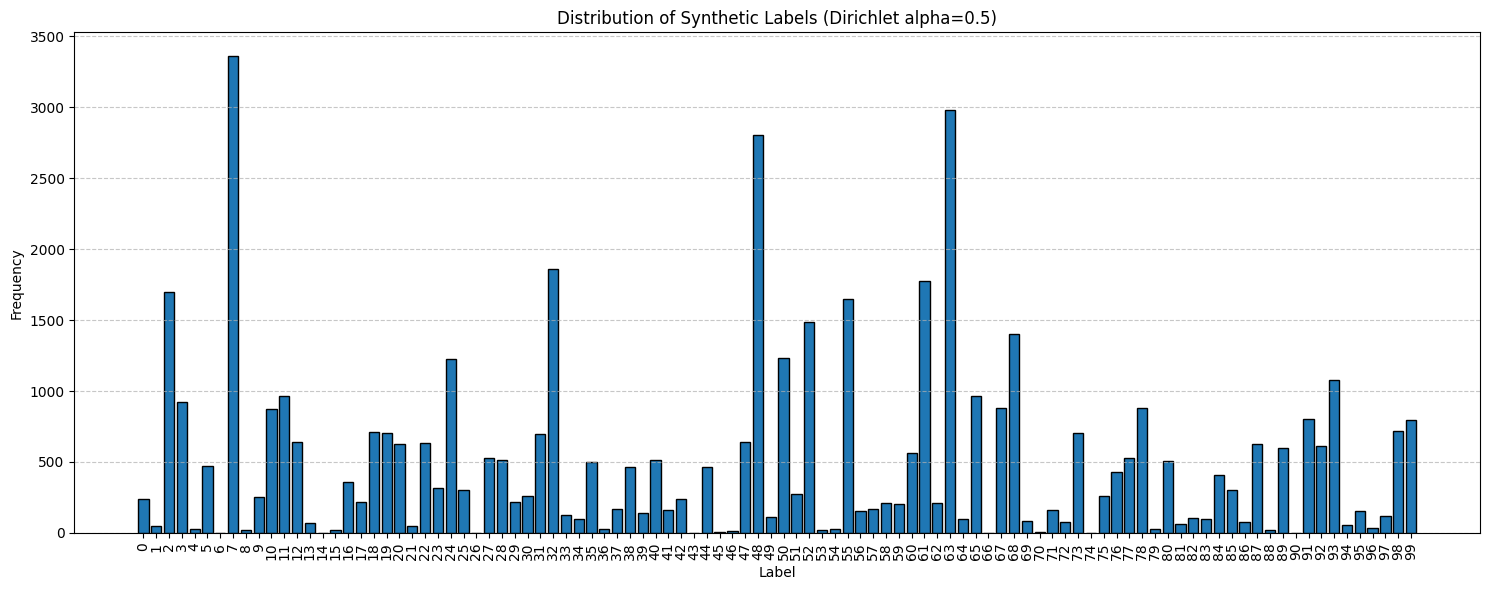

In [33]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load CIFAR-100 data
file_path = r'cifar-100-python\train'  # Adjust this path as necessary
datadict = unpickle(file_path)

# Extract labels
Y = datadict[b'fine_labels']
Y = np.array(Y)

# Number of samples in CIFAR-100 training set
num_samples = len(Y)

# Parameters for Dirichlet distribution
alpha = 0.5
num_categories = 100  # Number of CIFAR-100 labels

# Generate Dirichlet distribution samples
dirichlet_proportions = np.random.dirichlet([alpha] * num_categories, size=1)[0]

# Create synthetic label distribution based on Dirichlet proportions
synthetic_labels = np.random.choice(
    num_categories, 
    size=num_samples, 
    p=dirichlet_proportions
)

# Create a DataFrame to store the label distribution
label_counts = np.bincount(synthetic_labels, minlength=num_categories)
label_distribution_df = pd.DataFrame({
    'label': np.arange(num_categories),
    'count': label_counts
})

# Print the DataFrame
print(label_distribution_df)

#Number of samples in CIFAR-100 training set that have no data
print("Number of samples in CIFAR-100 training set that have no data: ", len(label_distribution_df[label_distribution_df["count"] == 0]))

# Plot histogram of synthetic Dirichlet-based labels
plt.figure(figsize=(15, 6))
plt.hist(synthetic_labels, bins=np.arange(num_categories + 1) - 0.5, edgecolor='black', rwidth=0.8)
plt.title(f'Distribution of Synthetic Labels (Dirichlet alpha={alpha})')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Set x-axis ticks to show all labels from 0 to 99
plt.xticks(ticks=np.arange(num_categories), labels=np.arange(num_categories), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

    label  count
0       0     78
1       1    569
2       2     69
3       3    803
4       4    422
..    ...    ...
95     95    657
96     96    610
97     97    116
98     98     16
99     99     19

[100 rows x 2 columns]
Number of samples in CIFAR-100 training set that have no data:  0


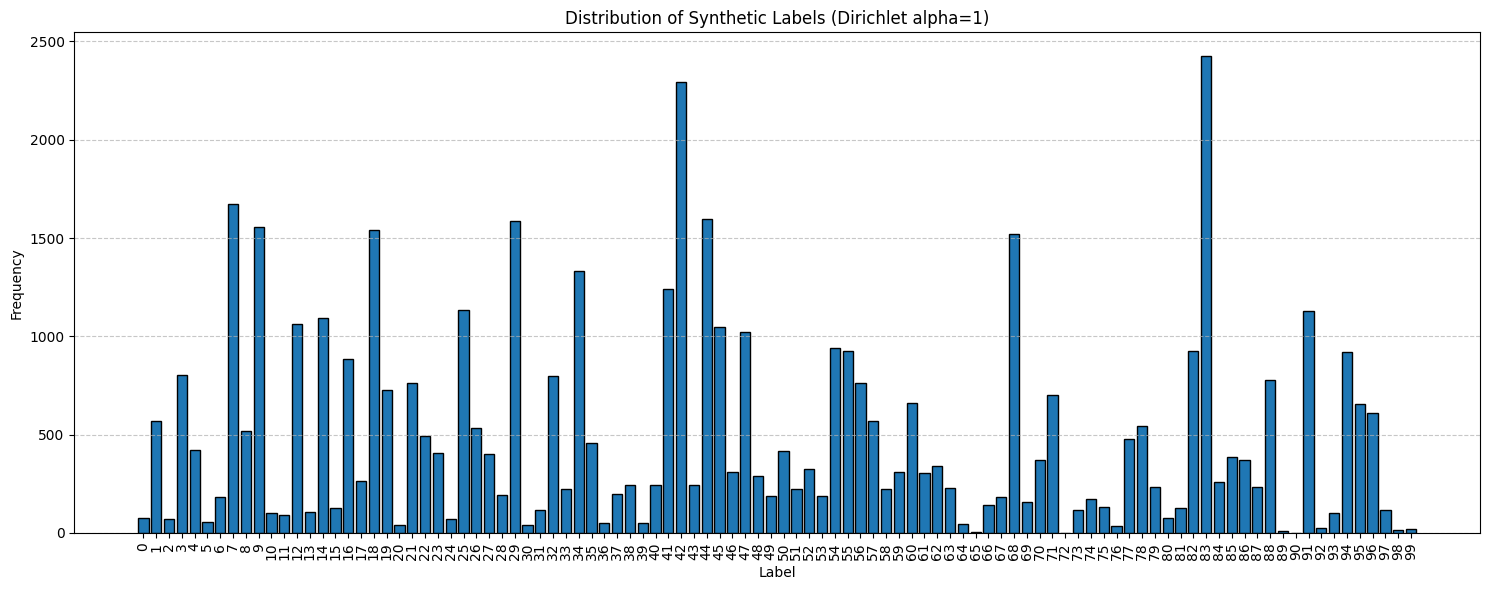

In [36]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load CIFAR-100 data
file_path = r'cifar-100-python\train'  # Adjust this path as necessary
datadict = unpickle(file_path)

# Extract labels
Y = datadict[b'fine_labels']
Y = np.array(Y)

# Number of samples in CIFAR-100 training set
num_samples = len(Y)

# Parameters for Dirichlet distribution
alpha = 1
num_categories = 100  # Number of CIFAR-100 labels

# Generate Dirichlet distribution samples
dirichlet_proportions = np.random.dirichlet([alpha] * num_categories, size=1)[0]

# Create synthetic label distribution based on Dirichlet proportions
synthetic_labels = np.random.choice(
    num_categories, 
    size=num_samples, 
    p=dirichlet_proportions
)

# Create a DataFrame to store the label distribution
label_counts = np.bincount(synthetic_labels, minlength=num_categories)
label_distribution_df = pd.DataFrame({
    'label': np.arange(num_categories),
    'count': label_counts
})

# Print the DataFrame
print(label_distribution_df)

#Number of samples in CIFAR-100 training set that have no data
print("Number of samples in CIFAR-100 training set that have no data: ", len(label_distribution_df[label_distribution_df["count"] == 0]))

# Plot histogram of synthetic Dirichlet-based labels
plt.figure(figsize=(15, 6))
plt.hist(synthetic_labels, bins=np.arange(num_categories + 1) - 0.5, edgecolor='black', rwidth=0.8)
plt.title(f'Distribution of Synthetic Labels (Dirichlet alpha={alpha})')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Set x-axis ticks to show all labels from 0 to 99
plt.xticks(ticks=np.arange(num_categories), labels=np.arange(num_categories), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

    label  count
0       0   1142
1       1    471
2       2   1395
3       3    555
4       4    466
..    ...    ...
95     95    255
96     96    903
97     97     90
98     98    374
99     99    172

[100 rows x 2 columns]
Number of samples in CIFAR-100 training set that have no data:  0


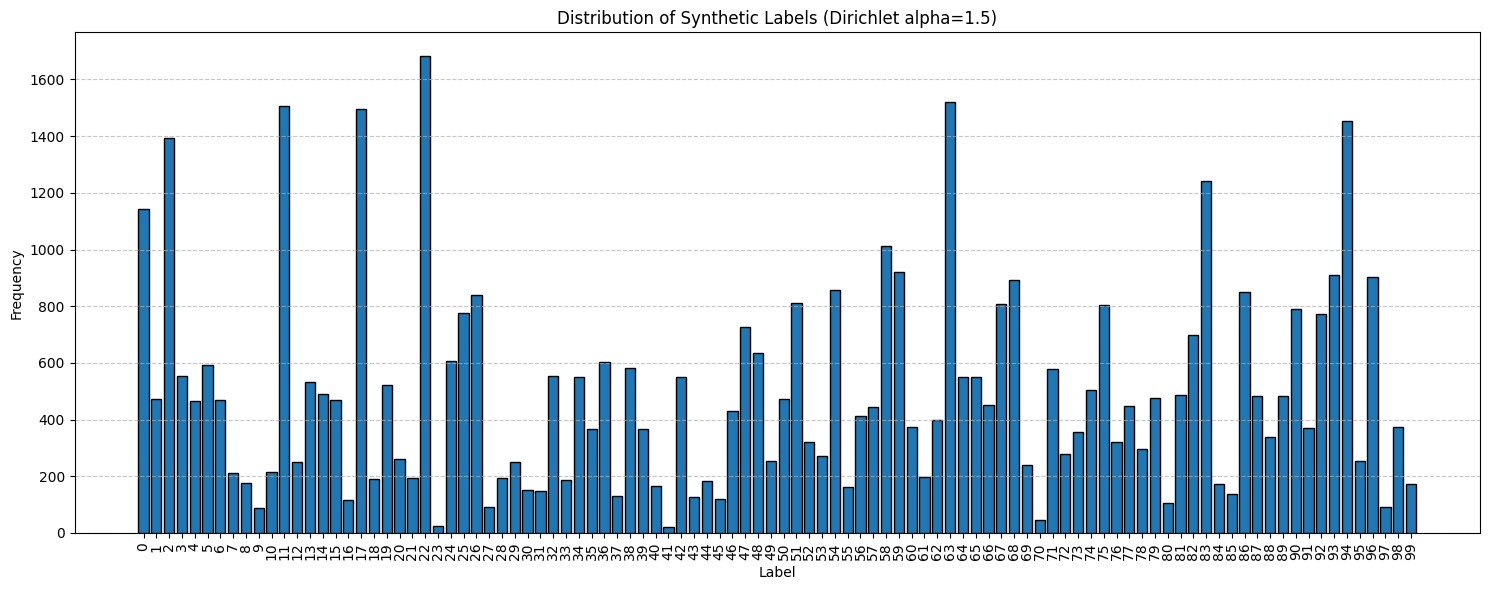

In [37]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load CIFAR-100 data
file_path = r'cifar-100-python\train'  # Adjust this path as necessary
datadict = unpickle(file_path)

# Extract labels
Y = datadict[b'fine_labels']
Y = np.array(Y)

# Number of samples in CIFAR-100 training set
num_samples = len(Y)

# Parameters for Dirichlet distribution
alpha = 1.5
num_categories = 100  # Number of CIFAR-100 labels

# Generate Dirichlet distribution samples
dirichlet_proportions = np.random.dirichlet([alpha] * num_categories, size=1)[0]

# Create synthetic label distribution based on Dirichlet proportions
synthetic_labels = np.random.choice(
    num_categories, 
    size=num_samples, 
    p=dirichlet_proportions
)

# Create a DataFrame to store the label distribution
label_counts = np.bincount(synthetic_labels, minlength=num_categories)
label_distribution_df = pd.DataFrame({
    'label': np.arange(num_categories),
    'count': label_counts
})

# Print the DataFrame
print(label_distribution_df)

#Number of samples in CIFAR-100 training set that have no data
print("Number of samples in CIFAR-100 training set that have no data: ", len(label_distribution_df[label_distribution_df["count"] == 0]))

# Plot histogram of synthetic Dirichlet-based labels
plt.figure(figsize=(15, 6))
plt.hist(synthetic_labels, bins=np.arange(num_categories + 1) - 0.5, edgecolor='black', rwidth=0.8)
plt.title(f'Distribution of Synthetic Labels (Dirichlet alpha={alpha})')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Set x-axis ticks to show all labels from 0 to 99
plt.xticks(ticks=np.arange(num_categories), labels=np.arange(num_categories), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


    label  count
0       0    720
1       1    119
2       2    119
3       3    427
4       4    916
..    ...    ...
95     95    315
96     96    340
97     97   1652
98     98    241
99     99    655

[100 rows x 2 columns]
Number of samples in CIFAR-100 training set that have no data:  0


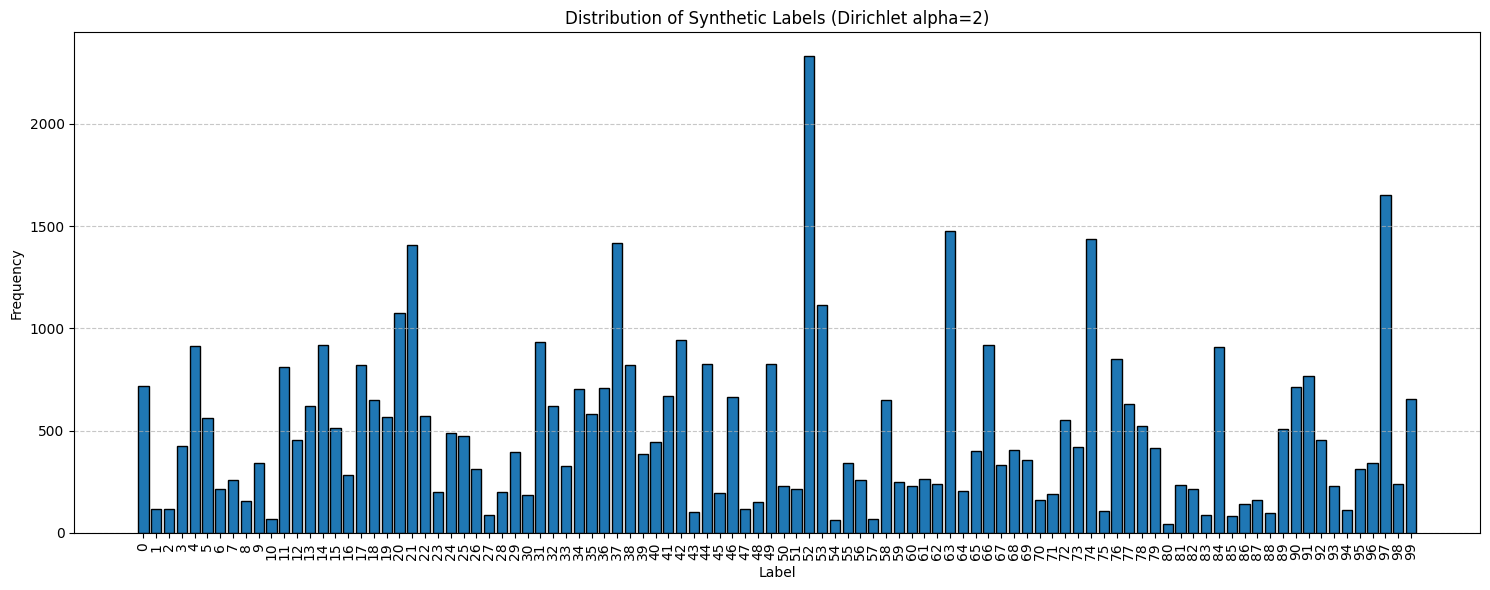

In [38]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load CIFAR-100 data
file_path = r'cifar-100-python\train'  # Adjust this path as necessary
datadict = unpickle(file_path)

# Extract labels
Y = datadict[b'fine_labels']
Y = np.array(Y)

# Number of samples in CIFAR-100 training set
num_samples = len(Y)

# Parameters for Dirichlet distribution
alpha = 2
num_categories = 100  # Number of CIFAR-100 labels

# Generate Dirichlet distribution samples
dirichlet_proportions = np.random.dirichlet([alpha] * num_categories, size=1)[0]

# Create synthetic label distribution based on Dirichlet proportions
synthetic_labels = np.random.choice(
    num_categories, 
    size=num_samples, 
    p=dirichlet_proportions
)

# Create a DataFrame to store the label distribution
label_counts = np.bincount(synthetic_labels, minlength=num_categories)
label_distribution_df = pd.DataFrame({
    'label': np.arange(num_categories),
    'count': label_counts
})

# Print the DataFrame
print(label_distribution_df)

#Number of samples in CIFAR-100 training set that have no data
print("Number of samples in CIFAR-100 training set that have no data: ", len(label_distribution_df[label_distribution_df["count"] == 0]))

# Plot histogram of synthetic Dirichlet-based labels
plt.figure(figsize=(15, 6))
plt.hist(synthetic_labels, bins=np.arange(num_categories + 1) - 0.5, edgecolor='black', rwidth=0.8)
plt.title(f'Distribution of Synthetic Labels (Dirichlet alpha={alpha})')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Set x-axis ticks to show all labels from 0 to 99
plt.xticks(ticks=np.arange(num_categories), labels=np.arange(num_categories), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

    label  count
0       0    576
1       1    739
2       2    413
3       3    294
4       4    473
..    ...    ...
95     95    310
96     96    448
97     97    415
98     98    639
99     99    560

[100 rows x 2 columns]
Number of samples in CIFAR-100 training set that have no data:  0


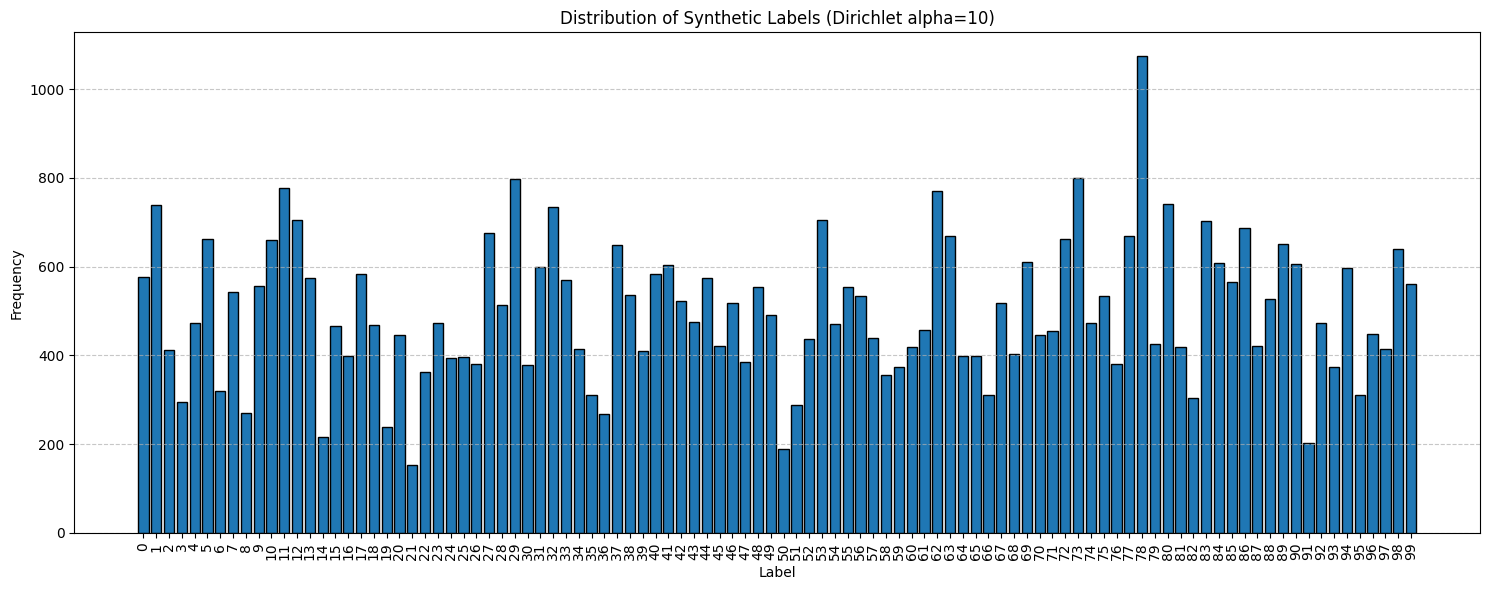

In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load CIFAR-100 data
file_path = r'cifar-100-python\train'  # Adjust this path as necessary
datadict = unpickle(file_path)

# Extract labels
Y = datadict[b'fine_labels']
Y = np.array(Y)

# Number of samples in CIFAR-100 training set
num_samples = len(Y)

# Parameters for Dirichlet distribution
alpha = 10
num_categories = 100  # Number of CIFAR-100 labels

# Generate Dirichlet distribution samples
dirichlet_proportions = np.random.dirichlet([alpha] * num_categories, size=1)[0]

# Create synthetic label distribution based on Dirichlet proportions
synthetic_labels = np.random.choice(
    num_categories, 
    size=num_samples, 
    p=dirichlet_proportions
)

# Create a DataFrame to store the label distribution
label_counts = np.bincount(synthetic_labels, minlength=num_categories)
label_distribution_df = pd.DataFrame({
    'label': np.arange(num_categories),
    'count': label_counts
})

# Print the DataFrame
print(label_distribution_df)

#Number of samples in CIFAR-100 training set that have no data
print("Number of samples in CIFAR-100 training set that have no data: ", len(label_distribution_df[label_distribution_df["count"] == 0]))

# Plot histogram of synthetic Dirichlet-based labels
plt.figure(figsize=(15, 6))
plt.hist(synthetic_labels, bins=np.arange(num_categories + 1) - 0.5, edgecolor='black', rwidth=0.8)
plt.title(f'Distribution of Synthetic Labels (Dirichlet alpha={alpha})')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Set x-axis ticks to show all labels from 0 to 99
plt.xticks(ticks=np.arange(num_categories), labels=np.arange(num_categories), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()